<a href="https://colab.research.google.com/github/GurkiratSarna/CE888-Decision-Making-UoE/blob/master/Lab%202%20-%2022nd%20January%202020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
# Bootstraping

In [7]:
customer_df=pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
print(customer_df)
customer_data = customer_df.values.T[1]
print(customer_data)

    Day   Millons of pounds in sales
0     1                          2.0
1     2                          8.0
2     3                         20.0
3     4                         13.0
4     5                          5.0
5     6                          9.0
6     7                         10.0
7     8                          8.0
8     9                         22.0
9    10                         10.0
10   11                          2.0
11   12                          4.0
12   13                          7.0
13   14                          9.0
[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]


In [4]:
customer_data.shape

(14,)

In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size) - this creates a 2d array of num of rows different everytime, 
#    the number of rows is same as ith value transferred from from the for loop
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function) - calculate the mean of the whole df
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values) - these values are mean of each row in the 2d array
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval

def boostrap_mean(sample, sample_size, n_iterations):
  bstraplist=np.random.choice(sample,(n_iterations,sample_size),replace=True)
  #print(bstraplist)
  data_mean=np.mean(bstraplist)
  mean_list=[]
  for i in range(len(bstraplist)):
    new_sample=bstraplist[i,:]
    sample_mean=np.mean(new_sample)
    mean_list.append(sample_mean)
    #print(new_sample)
    #print(sample_mean)
  #print(mean_list)

  #percentile function returns the scalar value. If you pass 2.5 then the value at 2.5th percent of the array. No need to sort.
  #for 95% we need to remove 2.5% from below and top - hence give 2.5 for lowest and 97.5 for highest
  lower=np.percentile(mean_list, 2.5)
  upper=np.percentile(mean_list, 97.5)
  #print(lower,"\t",upper)
  #print(data_mean)
  #print("----"*20)
  return data_mean,lower,upper

(0, 100000)

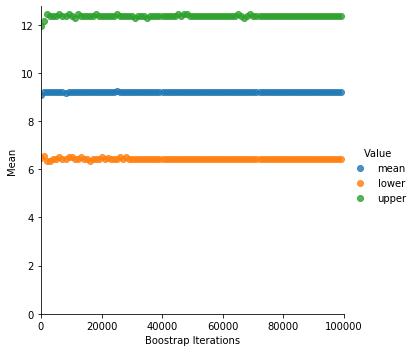

In [8]:
# Call your bootstrap function and plot the results

boots_cust1 = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(customer_data, customer_data.shape[0], i)
    boots_cust1.append([i, boot[0], "mean"])
    boots_cust1.append([i, boot[1], "lower"])
    boots_cust1.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots_cust1, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')

In [0]:
def boostrap_mean_ci(sample, sample_size, iterations, ci):
    bstraplist=np.random.choice(sample,(iterations,sample_size),replace=True)
    data_mean=np.mean(bstraplist)
    mean_list=[]
    for i in range(len(bstraplist)):
        new_sample=bstraplist[i,:]
        sample_mean=np.mean(new_sample)
        mean_list.append(sample_mean)
    lower=np.percentile(mean_list, (100-ci)/2)
    upper=np.percentile(mean_list, ci+(100-ci)/2)
    return data_mean, lower, upper

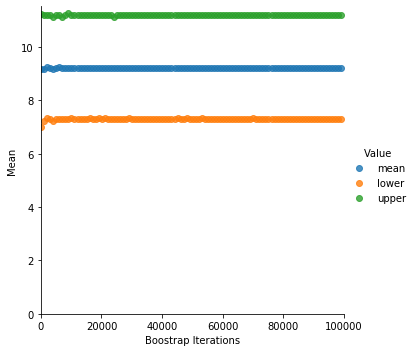

In [10]:
#80% CI
boots_cust2 = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(customer_data, customer_data.shape[0], i, 80)
    boots_cust2.append([i, boot[0], "mean"])
    boots_cust2.append([i, boot[1], "lower"])
    boots_cust2.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots_cust2, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')

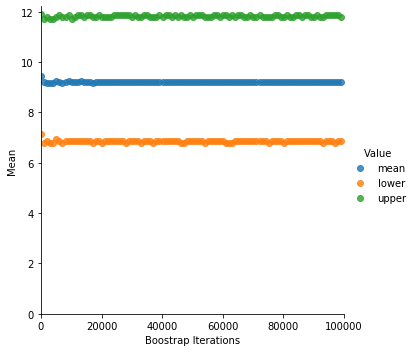

In [11]:
#90% CI
boots_cust3 = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(customer_data, customer_data.shape[0], i, 90)
    boots_cust3.append([i, boot[0], "mean"])
    boots_cust3.append([i, boot[1], "lower"])
    boots_cust3.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots_cust3, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_90.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_90.pdf", bbox_inches='tight')

In [0]:
vehicles_df=pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')

In [23]:
print(vehicles_df)

     Current fleet  New Fleet
0               18       24.0
1               15       27.0
2               18       27.0
3               16       25.0
4               17       31.0
..             ...        ...
244             27        NaN
245             27        NaN
246             32        NaN
247             28        NaN
248             31        NaN

[249 rows x 2 columns]


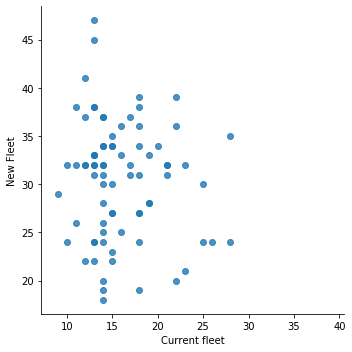

In [24]:
sns.lmplot(vehicles_df.columns[0], vehicles_df.columns[1],data=vehicles_df, fit_reg=False)

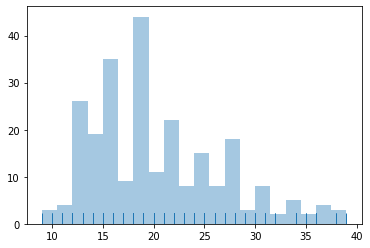

In [38]:
datacol0=vehicles_df[vehicles_df.columns[0]].values
sns.distplot(datacol0, bins=20, kde=False, rug=True)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


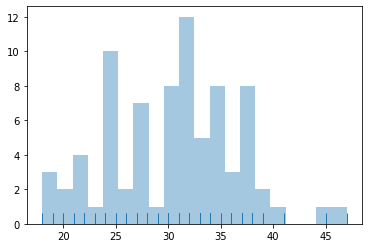

In [39]:
datacol1=vehicles_df[vehicles_df.columns[1]].values
sns.distplot(datacol1, bins=20, kde=False, rug=True)

In [36]:
#Calculate the mean of both samples.
x=vehicles_df[~np.isnan(vehicles_df)]
print(np.mean(x))


Current fleet    20.144578
New Fleet        30.481013
dtype: float64


In [45]:
boots = []
#for i in range(100, 100000, 1000):
boot = boostrap_mean_ci(datacol0, datacol0.shape[0], i,80)
boots.append([i, boot[0], "mean"])
boots.append([i, boot[1], "lower"])
boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
print(df_boot)
#sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

#sns_plot.axes[0, 0].set_ylim(0,)
#sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')

   Boostrap Iterations       Mean  Value
0                99100  20.144689   mean
1                99100  19.626506  lower
2                99100  20.666667  upper


In [49]:

datacol1_nonan = datacol1[np.logical_not(np.isnan(datacol1))]
print(datacol1_nonan)

boots = []
#for i in range(100, 100000, 1000):
boot = boostrap_mean(datacol1_nonan, datacol1_nonan.shape[0], i)
boots.append([i, boot[0], "mean"])
boots.append([i, boot[1], "lower"])
boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
print(df_boot)

[24. 27. 27. 25. 31. 35. 24. 19. 28. 23. 27. 20. 22. 18. 20. 31. 32. 31.
 32. 24. 26. 29. 24. 24. 33. 33. 32. 28. 19. 32. 34. 26. 30. 22. 22. 33.
 39. 36. 28. 27. 21. 24. 30. 34. 32. 38. 37. 30. 31. 37. 32. 47. 41. 45.
 34. 33. 24. 32. 39. 35. 32. 37. 38. 34. 34. 32. 33. 32. 25. 24. 37. 31.
 36. 36. 34. 38. 32. 38. 32.]
   Boostrap Iterations       Mean  Value
0                99100  30.481636   mean
1                99100  29.139241  lower
2                99100  31.822785  upper


In [47]:
print(type(datacol1))

<class 'numpy.ndarray'>


In [59]:
#Permutation Test
print(len(datacol0))
print(len(datacol1_nonan))
concat = np.concatenate((datacol0,datacol1_nonan))
print(concat)
print(len(concat))

249
79
[18. 15. 18. 16. 17. 15. 14. 14. 14. 15. 15. 14. 15. 14. 22. 18. 21. 21.
 10. 10. 11.  9. 28. 25. 19. 16. 17. 19. 18. 14. 14. 14. 14. 12. 13. 13.
 18. 22. 19. 18. 23. 26. 25. 20. 21. 13. 14. 15. 14. 17. 11. 13. 12. 13.
 15. 13. 13. 14. 22. 28. 13. 14. 13. 14. 15. 12. 13. 13. 14. 13. 12. 13.
 18. 16. 18. 18. 23. 11. 12. 13. 12. 18. 21. 19. 21. 15. 16. 15. 11. 20.
 21. 19. 15. 26. 25. 16. 16. 18. 16. 13. 14. 14. 14. 28. 19. 18. 15. 15.
 16. 15. 16. 14. 17. 16. 15. 18. 21. 20. 13. 23. 20. 23. 18. 19. 25. 26.
 18. 16. 16. 15. 22. 22. 24. 23. 29. 25. 20. 18. 19. 18. 27. 13. 17. 13.
 13. 13. 30. 26. 18. 17. 16. 15. 18. 21. 19. 19. 16. 16. 16. 16. 25. 26.
 31. 34. 36. 20. 19. 20. 19. 21. 20. 25. 21. 19. 21. 21. 19. 18. 19. 18.
 18. 18. 30. 31. 23. 24. 22. 20. 22. 20. 21. 17. 18. 17. 18. 17. 16. 19.
 19. 36. 27. 23. 24. 34. 35. 28. 29. 27. 34. 32. 28. 26. 24. 19. 28. 24.
 27. 27. 26. 24. 30. 39. 35. 34. 30. 22. 27. 20. 18. 28. 27. 34. 31. 29.
 27. 24. 23. 38. 36. 25. 38. 26. 22. 36. 27.

In [0]:
perm = np.random.permutation(concat)

In [62]:
print(perm)
print(len(perm))

[27. 20. 18. 34. 28. 13. 30. 32. 16. 16. 25. 19. 12. 36. 27. 31. 15. 20.
 36. 13. 19. 23. 19. 31. 27. 38. 26. 13. 27. 22. 25. 45. 18. 12. 35. 34.
 17. 14. 28. 14. 39. 22. 33. 13. 16. 14. 22. 16. 26. 15. 32. 24. 31. 13.
 13. 13. 32. 21. 14. 13. 13. 18. 38. 16. 28. 10. 32. 31. 36. 28. 20. 27.
 17. 14. 18. 37. 22. 25. 18. 24. 19. 14. 25. 28. 24. 30. 34. 24. 38. 27.
 24. 27. 15. 18. 14. 32. 19. 12. 13. 16. 18. 26. 17. 38. 39. 19. 32. 18.
 26. 23. 22. 14. 20. 18. 17. 16. 25. 17. 13. 21. 28. 18. 16. 26. 14. 18.
 25. 14. 20. 24. 21. 23. 27. 36. 19. 21. 34. 25. 36. 21. 24. 29. 16. 35.
 21. 30.  9. 25. 20. 32. 23. 16. 14. 18. 21. 20. 28. 31. 12. 11. 34. 27.
 26. 19. 18. 27. 13. 14. 16. 13. 17. 25. 35. 18. 22. 31. 34. 21. 13. 30.
 17. 35. 13. 28. 33. 32. 20. 20. 13. 25. 24. 34. 29. 38. 33. 16. 27. 15.
 18. 28. 18. 23. 15. 27. 19. 15. 19. 17. 20. 13. 22. 31. 22. 19. 14. 24.
 21. 15. 13. 37. 16. 19. 32. 32. 15. 33. 36. 18. 37. 17. 30. 23. 29. 36.
 24. 15. 19. 20. 26. 15. 19. 34. 21. 21. 18. 10. 15

In [72]:
pold=perm[:249]
print(pold)
print(len(pold))
pnew=perm[249:]
print(pnew)
print(len(pnew))

[27. 20. 18. 34. 28. 13. 30. 32. 16. 16. 25. 19. 12. 36. 27. 31. 15. 20.
 36. 13. 19. 23. 19. 31. 27. 38. 26. 13. 27. 22. 25. 45. 18. 12. 35. 34.
 17. 14. 28. 14. 39. 22. 33. 13. 16. 14. 22. 16. 26. 15. 32. 24. 31. 13.
 13. 13. 32. 21. 14. 13. 13. 18. 38. 16. 28. 10. 32. 31. 36. 28. 20. 27.
 17. 14. 18. 37. 22. 25. 18. 24. 19. 14. 25. 28. 24. 30. 34. 24. 38. 27.
 24. 27. 15. 18. 14. 32. 19. 12. 13. 16. 18. 26. 17. 38. 39. 19. 32. 18.
 26. 23. 22. 14. 20. 18. 17. 16. 25. 17. 13. 21. 28. 18. 16. 26. 14. 18.
 25. 14. 20. 24. 21. 23. 27. 36. 19. 21. 34. 25. 36. 21. 24. 29. 16. 35.
 21. 30.  9. 25. 20. 32. 23. 16. 14. 18. 21. 20. 28. 31. 12. 11. 34. 27.
 26. 19. 18. 27. 13. 14. 16. 13. 17. 25. 35. 18. 22. 31. 34. 21. 13. 30.
 17. 35. 13. 28. 33. 32. 20. 20. 13. 25. 24. 34. 29. 38. 33. 16. 27. 15.
 18. 28. 18. 23. 15. 27. 19. 15. 19. 17. 20. 13. 22. 31. 22. 19. 14. 24.
 21. 15. 13. 37. 16. 19. 32. 32. 15. 33. 36. 18. 37. 17. 30. 23. 29. 36.
 24. 15. 19. 20. 26. 15. 19. 34. 21. 21. 18. 10. 15

In [75]:
poldmean=np.mean(pold)
print(poldmean)
pnewmean=np.mean(pnew)
print(pnewmean)
print(pnewmean-poldmean)

22.775100401606426
22.189873417721518
-0.5852269838849082


In [76]:
datacol0mean=np.mean(datacol0)
print(datacol0mean)
datacol1_nonanmean=np.mean(datacol1_nonan)
print(datacol1_nonanmean)
print(datacol1_nonanmean-datacol0mean)

20.14457831325301
30.481012658227847
10.336434344974837
